In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import ceil
import seaborn as sns

In [196]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
org = pd.read_csv("Pulsar.csv")

train = pd.concat([train, org])

ids = test['id']
df = pd.concat([train, test])

In [197]:
df = df.drop(columns = 'id')

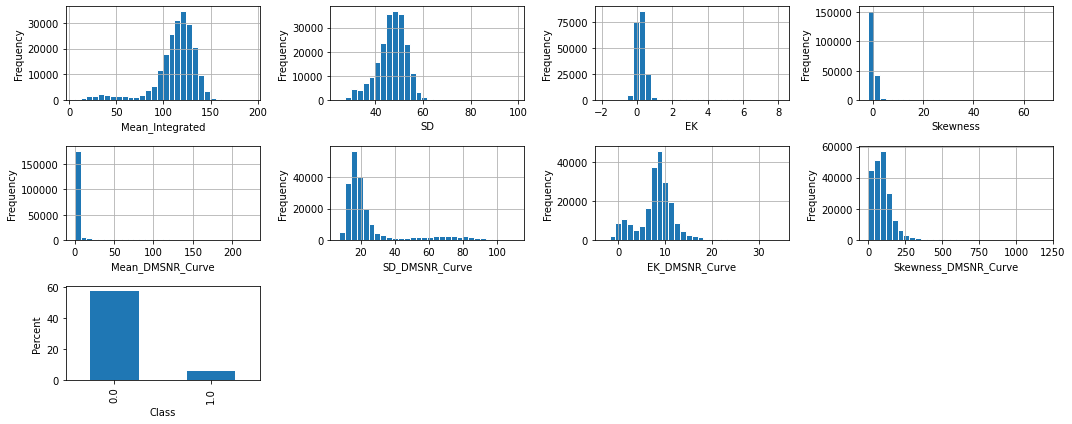

In [198]:
fig, axes = plt.subplots(3, 4, figsize=(15, 6))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-1]):
    (df[col]).hist(ax = axes[i], bins = 30, edgecolor='white')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

(100* df['Class'].value_counts() / len(df)).plot.bar(ax = axes[8])
axes[8].set_xlabel("Class")
axes[8].set_ylabel("Percent")

for ax in axes[9:]:
    ax.axis('off')
    
plt.tight_layout()

<Axes: >

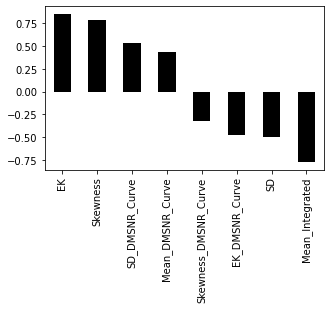

In [199]:
df.corr()['Class'].sort_values(ascending=False)[1:].plot.bar(figsize = (5, 3), cmap='copper')

In [200]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df.drop(columns='Class')
y = df['Class']

features = X.columns.values

Scaler = MinMaxScaler()
Scaler.fit(X)
X = Scaler.transform(X)

X = pd.DataFrame(X, columns = features)

X_test = X[len(train):]
X = X.iloc[:len(train)]
y = y.iloc[:len(train)]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

In [202]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_train_pred = model_lr.predict(X_train)
y_valid_pred = model_lr.predict(X_valid)

print("Training f1_score: ", metrics.f1_score(y_train, y_train_pred))
print("Validation f1_score: ", metrics.f1_score(y_valid, y_valid_pred))

print("Training log loss: ", metrics.log_loss(y_train, y_train_pred))
print("Validation log loss: ", metrics.log_loss(y_valid, y_valid_pred))

Training f1_score:  0.925241969004216
Validation f1_score:  0.9217032967032968
Training log loss:  0.45858629421260577
Validation log loss:  0.48444078106305744


In [203]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)

print("Training f1_score: ", metrics.f1_score(y_train, y_train_pred))
print("Validation f1_score: ", metrics.f1_score(y_valid, y_valid_pred))

print("Training log loss: ", metrics.log_loss(y_train, y_train_pred))
print("Validation log loss: ", metrics.log_loss(y_valid, y_valid_pred))

Training f1_score:  0.9715076710116506
Validation f1_score:  0.939930276213462
Training log loss:  0.1799379590179556
Validation log loss:  0.38075446172815597


In [194]:
final_model = XGBClassifier()
model.fit(X, y)
print("Training score: ", metrics.f1_score(y, model.predict(X)))
y_test_pred = model.predict(X_test)

Training score:  0.6996336996336996


In [190]:
output = pd.DataFrame({'id': ids, 'Class': y_test_pred})

In [191]:
output.to_csv("Submission3.csv", index=False)